In [2]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(readr)
library(stringr)
library(ggbeeswarm)
options(scipen = 999)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
p = ggplot() + 
    theme_light() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9))

In [4]:
df = read.csv('comp_times.csv')

In [5]:
df %>% head

total_time,common_opt,my_opt_time,o3_opt,Benchmark,type
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
0.448,0.095,0.041,0.312,correlation,SSE
0.412,0.079,0.038,0.294,covarianc,SSE
0.413,0.089,0.037,0.287,gemm,SSE
0.448,0.092,0.039,0.317,gemver,SSE
0.334,0.073,0.036,0.226,gesummv,SSE
0.461,0.091,0.038,0.331,symm,SSE


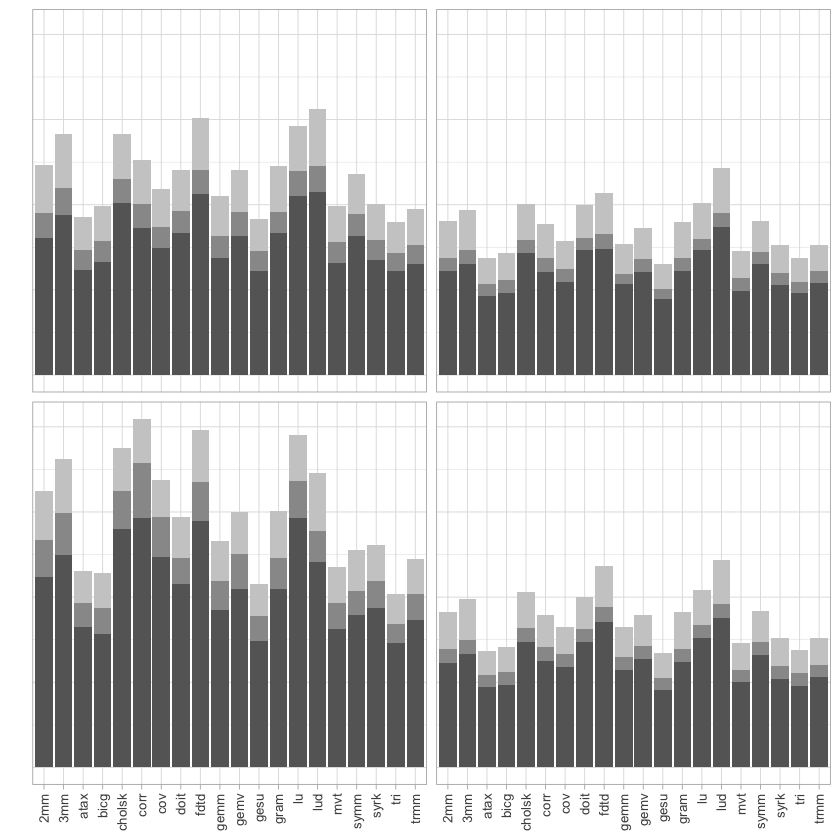

In [9]:
# impact of RO in compilation time

ct = df %>% gather('header', 'values', 1:4)

p + 
    geom_bar(data = ct %>% filter (header != 'total_time'), aes(x = Benchmark, y = values, fill = header), stat = 'identity') + 
    scale_fill_manual (values = c('gray80', 'gray60', 'gray40')) +
    facet_wrap(~ type, ncol = 2, ) +
#     theme(legend.position = 'none') +
#     theme(axis.text.x=element_blank(), axis.ticks.x = element_blank()) +
    theme(axis.text.y=element_blank(), axis.ticks.y = element_blank()) +
    theme(strip.background = element_blank(), strip.text.x = element_blank()) +
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1, size = 8)) +
    theme(legend.position = "none") +
#     theme(axis.text.x = element_text(angle = 90, vjust=1, hjust=1)) +
    scale_x_discrete(labels = c('2mm', '3mm', 'atax', 'bicg', 'cholsk', 'corr',
                                'cov', 'doit', 'fdtd', 'gemm', 'gemv',
                                'gesu', 'gram', 'lu', 'lud', 'mvt', 'symm',
                                'syrk', 'tri', 'trmm')) +
    ylab('') +
    ggsave('rq5_absolute.pdf', device = 'pdf', height = 3, width = 4)

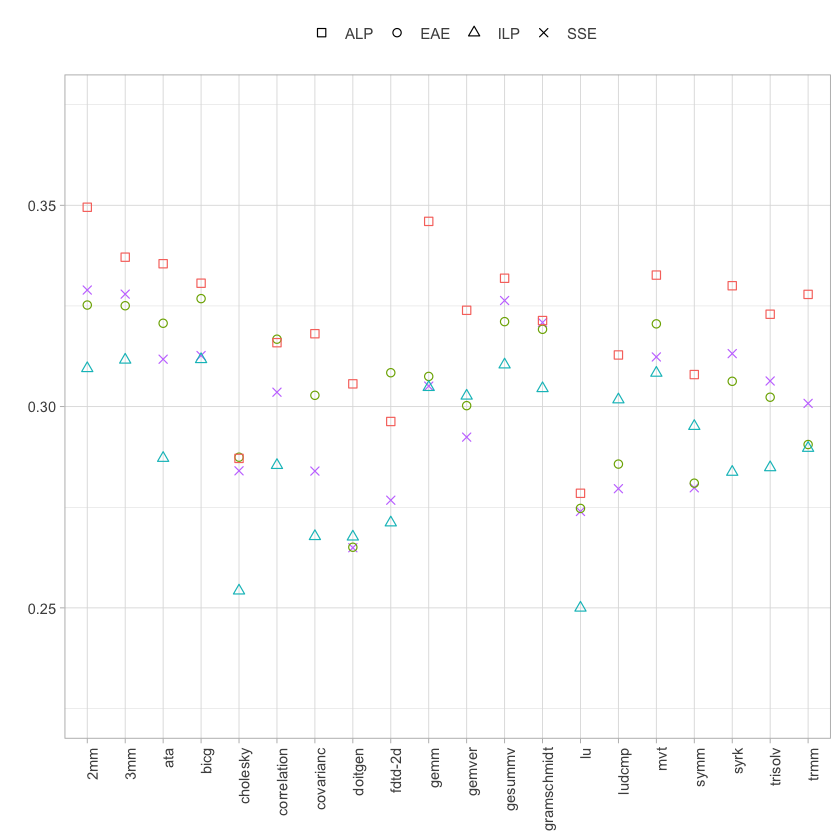

In [7]:
# and how is the impact of RO in terms of percentage
perc = df %>% 
    mutate(percentage = (common_opt + my_opt_time) / total_time) %>% 
    select(Benchmark, type, percentage)
  
p +
    geom_point(data = perc, aes(x = Benchmark, y = percentage, colour = type, shape = type), stat = 'identity', size = 2) +
    scale_shape_manual(values = c(0, 1, 2, 4)) +
    guides(colour = F) +
    ylim(0.225, 0.375) +
    ylab('') +
    ggsave('rq5_percentage.pdf', device = 'pdf', height = 3, width = 4)